In [1]:
import mfd as mfd
from random import choices, seed
import matplotlib.pyplot as plt 
import numpy as np
import random
from scipy.stats import nbinom, poisson, t as T, sem

In [2]:
bvalue, avalue, Mmin, Mmax =1.0, 5.0, 5.0, 8.01
mags = mfd.sample_GRdistr(bvalue, avalue, Mmin, Mmax, \
                   nevents = 100000, mbin=0.001, \
                   rseed=12121);

In [3]:
Mwr = [round(m, 1) for m in mags]
b = mfd.calc_bvalue(Mwr, magbin=0.001)
print(b)

1.004541617194354


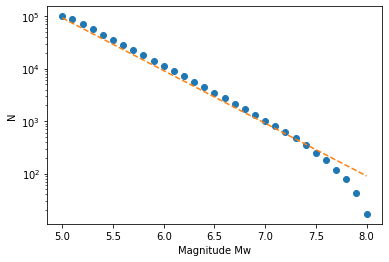

In [4]:
N, M = mfd.distr_empirical(Mwr, magbin = 0.1, doplot=True);
a = mfd.calc_avalue(b, M, N)
pN = [10**(a-b*m) for m in M]
plt.plot(M, pN, '--');

In [5]:
# 50 years - 5 events yearly 
#random.seed(1520)
#Mw_firstsample = random.choices(Mwr, k=250)
#b = mfd.calc_bvalue(Mw_firstsample, magbin=0.001)
#print('bvalue=', b)

random.seed(1520)
N = 50 # number of years
n = 5.0 # sort of appr. mean cpount
p = 0.5
b_negbin_boots = []
yearlycount = nbinom.rvs(n=n,p =p, size=N)
Mw_firstsample = []
for yc in yearlycount:
    Mw_firstsample = Mw_firstsample + random.choices(Mwr, k=yc)

b = mfd.calc_bvalue(Mw_firstsample, magbin=0.001)
print('bvalue =', b)
print('number of events', len(Mw_firstsample))

bvalue = 0.9880769341004382
number of events 228


0.9916661556281099
0.8692447098156612 1.1327931111605614


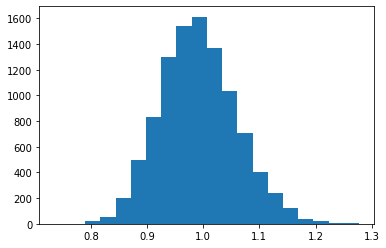

In [6]:
# let us see bootstrap b-values
b_boots = []
nsample = len(Mw_firstsample)
for t in range(10000): 
    Msamp = random.choices(Mw_firstsample, k=nsample)
   #  NN, MM = mfd.distr_empirical(Msamp, magbin = 0.1, doplot=False);
   #  plt.semilogy(MM, NN, '-');
    
    b_boots.append(mfd.calc_bvalue(Msamp, magbin=0.001))
plt.show()
print(np.mean(b_boots))
plt.hist(b_boots, 20);

ordered = sorted(b_boots)
alpha = 0.95
lower = np.percentile(ordered, 2.5)
upper = np.percentile(ordered, 97.5)
print(lower, upper)

0.993169178029603
(0.9918739153228328, 0.9944644407363733)
0.871182907869724 1.1310288699445372


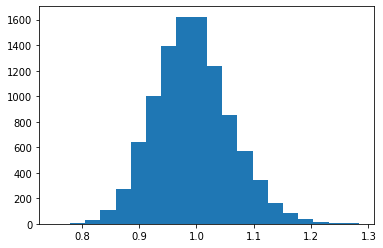

In [7]:
# let us see negbin bootstrap b-values
# generate a negbin counts
N = 50 # number of years
n = 5.0 # sort of appr. mean cpount
p = 0.5

b_negbin_boots = []
nsample = len(Mw_firstsample)
for t in range(10000): 
    yearlycount = nbinom.rvs(n=n,p =p, size=N)
    Msamp = []
    for yc in yearlycount:
        Msamp = Msamp + random.choices(Mw_firstsample, k=yc)
    b_negbin_boots.append(mfd.calc_bvalue(Msamp, magbin=0.001))
print(np.mean(b_negbin_boots))
plt.hist(b_negbin_boots, 20);
#create 95% confidence interval for population mean weight
conf = T.interval(alpha=0.95, df=len(b_negbin_boots)-1, loc=np.mean(b_negbin_boots), \
                  scale=sem(b_negbin_boots)) 

print(conf)

ordered = sorted(b_negbin_boots)
alpha = 0.95
lower = np.percentile(ordered, 2.5)
upper = np.percentile(ordered, 97.5)
print(lower, upper)

0.9924231795929749
0.8763674627383227 1.127968223327339


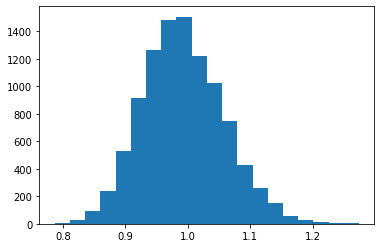

In [8]:
# let us see poss bootstrap b-values
# generate a negbin counts
N = 50 # number of years
mu = 5

b_poss_boots = []
nsample = len(Mw_firstsample)

for t in range(10000): 
    # generate a poisson random number
    yearlycount = poisson.rvs(mu=mu, size=N)
    Msamp = []
    for yc in yearlycount:
        Msamp = Msamp + random.choices(Mw_firstsample, k=yc)
    b_poss_boots.append(mfd.calc_bvalue(Msamp, magbin=0.001))
print(np.mean(b_poss_boots))
plt.hist(b_poss_boots, 20);

ordered = sorted(b_poss_boots)
alpha = 0.95
lower = np.percentile(ordered, 2.5)
upper = np.percentile(ordered, 97.5)
print(lower, upper)

bvalue = 1.0953646358696163
number of events 249
1.0991770572768578
0.9934269463895753 1.2141102101074437


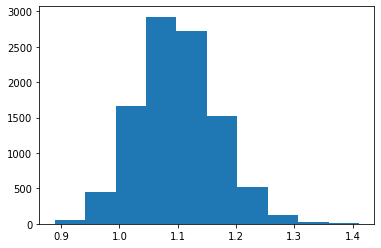

boot = 1.0993750985406472
0.9946178275725324 1.2147142190510447


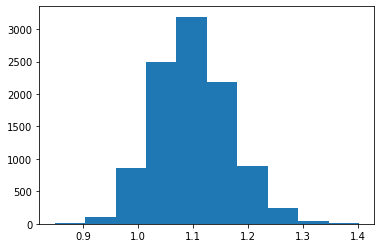

In [45]:
# assumuing NegBin >>> Pois 

# let us see poss bootstrap b-values
# generate a negbin counts
N = 50 # number of years

# 50 years - 5 events yearly 
#random.seed(1520)
#Mw_firstsample = random.choices(Mwr, k=150)
#b = mfd.calc_bvalue(Mw_firstsample, magbin=0.001)
#print('orgin bvalue=', b)

#random.seed(1520)
N = 50 # number of years
n = 5.0 # sort of appr. mean cpount
p = 0.5
b_negbin_boots = []
yearlycount = nbinom.rvs(n=n,p =p, size=N)
Mw_firstsample = []
for yc in yearlycount:
    Mw_firstsample = Mw_firstsample + random.choices(Mwr, k=yc)

b = mfd.calc_bvalue(Mw_firstsample, magbin=0.001)
print('bvalue =', b)
print('number of events', len(Mw_firstsample))



b_boots = []
b_poss_boots = []
nsample = len(Mw_firstsample)

pcounts = poisson.rvs(mu=nsample, size=10000)

for pc in pcounts:
    # generate a poisson random number
    Msamp = random.choices(Mw_firstsample, k=pc)
    b_poss_boots.append(mfd.calc_bvalue(Msamp, magbin=0.001))
    
    Msampboot = random.choices(Mw_firstsample, k=nsample)
    b_boots.append(mfd.calc_bvalue(Msampboot, magbin=0.001))
    
print(np.mean(b_poss_boots))
plt.hist(b_poss_boots);

ordered = sorted(b_poss_boots)
alpha = 0.95
lower = np.percentile(ordered, 5)
upper = np.percentile(ordered, 95)
print(lower, upper)

# let us see bootstrap b-values
plt.show()
print('boot =', np.mean(b_boots))
plt.hist(b_boots);

ordered = sorted(b_boots)

lower = np.percentile(ordered, 5)
upper = np.percentile(ordered, 95)
print(lower, upper)

1.0164529102565378


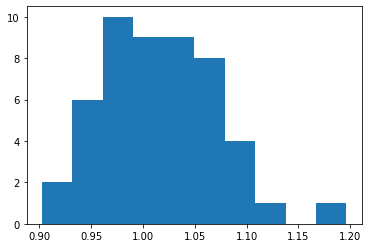

In [54]:


N = 50 # number of years
n = 5.0 # sort of appr. mean cpount
p = 0.5
b_negbin_boots = []
for _ in range(50):
    yearlycount = nbinom.rvs(n=n,p =p, size=N)
    Mw_firstsample = []
    for yc in yearlycount:
        Mw_firstsample = Mw_firstsample + random.choices(Mwr, k=yc)
    b = mfd.calc_bvalue(Mw_firstsample, magbin=0.001)
    b_negbin_boots.append(b)

plt.hist(b_negbin_boots);
print(np.mean(b_negbin_boots))